### Problem No. 1
A perfectly stirred, constant-volume tank has two input
streams, both consisting of the same liquid. The temperature
and flow rate of each of the streams can vary with time.

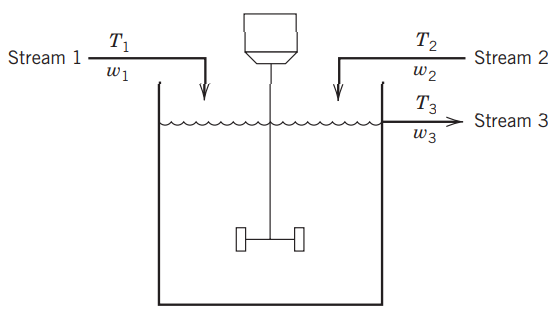

**(a)** Derive a dynamic model that will describe transient operation. 

**(b)** Simplify your model, if possible, to one or more differential equations by eliminating any algebraic equations. Also,
simplify any derivatives of products of variables.   

**(c)** Make a degrees of freedom analysis assuming that both
Streams 1 and 2 come from upstream units (i.e., their flow rates
and temperatures are known functions of time).

**(d)** if the tank volume is 5 $m^3$, the inlet streams are pure water with a density of 1000 $kg/m^3$ and specific heat of 4.2 $kj/kg.C$, Stream 1 enters the tank at 250 $kg/min$ and 25 C and stream 2 enters at 150 $kg/min$ and 50 C, what is the steady state temperature of the outlet temperature.

**(e)** if stream 2 was interrupted suddenlty and the tank became fed only with steam 1, plot the temperaure profile of the outlet steam and determine its new steady state temperature.

**(f)** if the steady state time is assumed to be reached if the outlet temperature reach 95% of $T_3 (\infty )$, how long does it take the tank to reach steady state condition after the interruption has takenplace.

**Notes**:
$w_i$ denotes mass flow rate for stream i.
Liquid properties are constant (not functions of temperature)

### Solution

**(a)**   
overall mass balance:
$$\frac{d(\rho V)}{dt}=w_1+w_2-w_3$$

Energy balance:   
$$C\frac{d[\rho V(T_3-T_{ref})]}{dt}=w_1C(T_1-T_{ref}) + w_2C(T_2-T_{ref})-w_3C(T_3-T_{ref})$$

assumptions:
- $\rho$ is constant
- Volume is constant because of the overflow outlet stream

overall mass balance becomes:
$$w_3=w3_1+w_2$$

**(b)**   
substitue overall mass balance in energy balance equation:

$$
\rho C \bar{V} \frac{d\left(T_3-T_{r e f}\right)}{d t}=\rho C \bar{V} \frac{d T_3}{d t}=w_1 C\left(T_1-T_{r e f}\right)+w_2 C\left(T_2-T_{r e f}\right)
-\left(w_1+w_2\right) C\left(T_3-T_{r e f}\right)
$$

Specific heat C can be cancelled as well as $T_{ref}$:

$$
\rho \bar{V} \frac{d T_3}{d t}=w_1 T_1+w_2 T_2-\left(w_1+w_2\right) T_3
$$

$$
\rho \bar{V} \frac{d T_3}{d t}+(w_1+w_2)T_3=w_1 T_1+w_2 T_2 
$$

$$
\tau \frac{d T_3}{d t}+T_3=\beta\\
\beta=\frac{w_1 T_1+w_2 T_2}{w_1+w_2}\\
\tau=\frac{\rho \bar{V}}{w_1+w_2}
$$

**(c)**   
Degree of greedom analysis:

Parameters: $\rho$, $\bar{V}$   
Variables: $w_1$, $w_2$, $T_1$, $T_2$, $T_3$   
NE : 1    
NV : 5    

Therefore,
$$N_F=5-1=4$$

Because $w_1$, $w_2$, $T_1$ and $T_2$ are determined by upstream units we could assume that they are known function of time:  

$$
\begin{aligned}
&w_1=w_1(\mathrm{t}) \\
&w_2=w_2(\mathrm{t}) \\
&T_1=T_1(\mathrm{t}) \\
&T_2=T_2(\mathrm{t})
\end{aligned}
$$
Thus, $N_F$ is reduced to 0.

**(d)**   

At steady state the energy balance equation becomes:

$$T_3=\beta=\frac{w_1T_1+w_2T_2}{(w_1+w_2)}$$

In [95]:
rho=1000 # kg/m3
V= 5 # m3
w1=250 # kg/min
w2=150 # kg/min
T1=25 # C
T2=50 # C
T3=(w1*T1+w2*T2)/(w1+w2)
print(f"The steady state temperature of the outlet stream is {T3} C")

The steady state temperature of the outlet stream is 34.375 C


**(e)**   
Soving the differential equation:

$$   
\tau \frac{d T_3}{d t}+T_3=\beta,\qquad T_3(0)=34.375 C\\
\beta=\frac{w_1 T_1+w_2 T_2}{w_1+w_2}=T_1=25\\
\tau=\frac{\rho \bar{V}}{w_1+w_2}=\frac{\rho \bar{V}}{w_1}=\frac{(1000)(5)}{250}=20
$$

Solving the above differential equation with any method you prefer, here I am going to use the python package ***sympy*** to solve the differential equation:

In [96]:
# using sympy module to find the analytic solution for the ODE

import sympy as sp

sp.init_printing()
tau, beta, t = sp.symbols('tau beta t')
T3 = sp.Function('T3')(t)
ode = sp.Eq(tau*T3.diff(t)+T3, beta)
# apply initial conditions
ics={T3.subs(t,0):34.375}

sol = sp.dsolve(ode, T3,ics=ics).subs({beta:25,tau:20})
sol

Plotting the dynamic of the mixing tank through matplotlib package

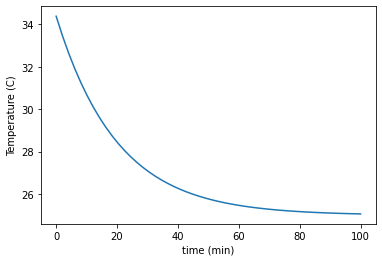

In [97]:
import numpy as np
import matplotlib.pyplot as plt
f=sp.lambdify(t,sol.rhs)
t=np.linspace(0,100)
T3=f(t)
plt.plot(t,T3)
plt.xlabel("time (min)")
plt.ylabel("Temperature (C)")
plt.show()

**(f)**
from the solution to the differential equation we can obtain the steady state outlet temperature by setting the time as $\infty$:

$$T_3(t)=34.375e^{-\frac{t}{20}}+\beta(1-e^{-\frac{t}{20}})\\
T(\infty)=\beta=25$$

The time required to reach 95% of the temperature at $T_3(\infty)$ can be formulate as:

In [102]:
sst=sp.Eq(sol.rhs,25/.95)
sst

solving for t using sympy package will result in :

In [104]:
t=sp.symbols("t")
print(f"The time required to reach 95% of the steady state temperature is {sp.solve(sst,t)[0]:.3f} min")

The time required to reach 95% of the steady state temperature is 39.272 min
